# **Pertemuan 04: Classification (Logistic Regression & Decision Tree)**

|  Nama | NIM |
| :--- | :--- |
| Muhammad Zaky Farhan | 105841110523 |

**Tujuan Praktikum:**

Praktikum keempat ini bertujuan untuk mengenalkan cara membuat model klasifikasi otomatis. Fokus utamanya ada pada dua algoritma utama, yaitu Logistic Regression yang bekerja dengan cara menebak peluang dari sebuah data, dan Decision Tree yang bekerja dengan membuat aturan bercabang layaknya sebuah pohon. Di sini, kemampuan model akan diukur menggunakan beberapa rumus hitung, mulai dari akurasi, presisi, recall, hingga skor F1. Selain itu, ada juga penggunaan matriks kebingungan (confusion matrix) untuk melihat secara langsung di posisi mana saja model tersebut salah menebak kelompok datanya.

Pembuatan model klasifikasi berbeda cara kerjanya dengan regresi. Kalau regresi dipakai untuk menebak angka yang nilainya bebas, klasifikasi dipakai khusus untuk menebak kelompok atau kategori dari sebuah data, misalnya menentukan apakah sebuah pesan masuk ke kategori spam atau tidak, atau sekadar membedakan angka nol dan satu. Untuk melakukan tebakan kategori ini, model dilatih menggunakan dua algoritma yang paling umum, yaitu Logistic Regression dan DecisionTreeClassifier. Algoritma Logistic Regression bekerja dengan cara menghitung peluang atau kemungkinan matematis dari sebuah data untuk bisa masuk ke kelompok tertentu. Sedangkan algoritma Decision Tree bekerja dengan cara menyusun aturan syarat bercabang yang bentuknya mirip seperti pohon untuk memilah data lapis demi lapis.

Setelah model selesai dilatih, hasil tebakannya perlu dinilai menggunakan beberapa patokan ukur. Alat ukur bentuk visual yang dipakai adalah matriks kebingungan (confusion matrix), yaitu sebuah tabel yang langsung memperlihatkan jumlah tebakan yang letaknya sudah benar dan tebakan yang salah masuk ke kelompok lain.  Selain tabel tersebut, kualitas tebakan model juga dihitung menggunakan angka. Hitungan akurasi dipakai untuk melihat persentase kebenaran model secara keseluruhan. Hitungan presisi dipakai untuk mengecek seberapa bisa dipercaya tebakan model saat memilih sebuah kelas, lalu hitungan recall dipakai untuk melihat seberapa banyak data asli dari kelas tersebut yang berhasil disaring oleh model. Terakhir, hitungan skor F1 dipakai untuk mencari nilai tengah dari presisi dan recall agar penilaian modelnya lebih seimbang.

## Penjelasan Kode Ringkas

Langkah pertama dimulai dengan memanggil alat-alat bantu dari pustaka scikit-learn. Fungsi `load_iris` dipanggil untuk membawa masuk data ciri fisik bunga, sedangkan `train_test_split` bertugas membelah data tersebut menjadi dua tumpukan, yaitu data untuk belajar dan data ujian. Dua mesin utama yang digunakan didatangkan lewat `LogisticRegression` dan `DecisionTreeClassifier`. Untuk menilai hasil belajarnya nanti, alat ukur seperti `accuracy_score`, `confusion_matrix`, dan `classification_report` juga ikut disiapkan.

Dataset bunga Iris kemudian dimuat ke dalam memori komputer. Data mentah ini langsung dipotong dengan `train_test_split` menggunakan perbandingan 80 banding 20. Artinya, 80 persen data dipakai untuk bahan latihan, dan 20 persen sisanya disimpan rapat-rapat untuk bahan ujian akhir. Pengaturan `random_state=42` dipasang agar hasil acakan datanya selalu sama persis setiap kali kode dijalankan. Setelah itu, model Logistic Regression disiapkan dengan aturan `max_iter=200` agar mesin komputasinya punya waktu lebih lama untuk mengulang hitungan sampai menemukan titik yang pas. Model Decision Tree juga disiapkan dengan aturan `max_depth=3` agar ranting pohonnya dibatasi maksimal tiga tingkat ke bawah; tujuannya agar model tidak kebingungan saat melihat data baru.

Kedua mesin ini lalu disuruh belajar mengenali ciri bunga lewat perintah `.fit()`. Agar penulisan kode lebih ringkas, sebuah perulangan dibentuk untuk menguji kedua model ini secara bergantian. Di dalam perulangan tersebut, perintah `.predict()` bertugas memberikan tebakan jenis bunga berdasarkan data ujian. Tebakan ini kemudian langsung dicocokkan dengan jawaban aslinya untuk mencari nilai akurasi menggunakan `accuracy_score`. Detail tebakannya dicetak ke layar menggunakan `confusion_matrix` dan `classification_report` agar terlihat jelas spesies mana saja yang ditebak dengan benar dan mana yang salah.

In [1]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Dataset Iris: 150 bunga, 4 fitur, 3 kelas (setosa, versicolor, virginica).
iris = load_iris()
X_train, X_test, y_train, y_test = train_test_split(
    iris.data, iris.target, test_size=0.2, random_state=42
)

# Logistic Regression: model statistik yang menghitung probabilitas tiap kelas.
lr = LogisticRegression(max_iter=200).fit(X_train, y_train)

# Decision Tree: model pohon keputusan yang memecah data berdasarkan aturan if-else.
dt = DecisionTreeClassifier(max_depth=3, random_state=42).fit(X_train, y_train)

# Loop untuk mengevaluasi kedua model sekaligus.
for name, model in {"LogReg": lr, "DecisionTree": dt}.items():
    pred = model.predict(X_test)
    print(f"\n{name} accuracy:", round(accuracy_score(y_test, pred), 3))
    print(confusion_matrix(y_test, pred))           # tabel prediksi vs aktual
    print(classification_report(y_test, pred, target_names=iris.target_names))  # precision, recall, F1


LogReg accuracy: 1.0
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30


DecisionTree accuracy: 1.0
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



Hasil eksekusi mencetak nilai akurasi sebesar 1.0 untuk kedua model, yang berarti seluruh tebakan berhasil mengenai sasaran tanpa meleset satupun. Matriks kebingungan membuktikan hal ini dengan deretan angka 10, 9, dan 11 yang letaknya menyilang di tengah, menandakan tidak ada data spesies bunga yang tertukar ke kolom lain. Laporan klasifikasi juga menampilkan deretan angka 1.00 pada semua bagian. Angka-angka sempurna ini muncul karena ukuran panjang dan lebar kelopak bunga pada dataset Iris memang memiliki perbedaan fisik yang sangat jelas antarsatu spesies dengan spesies lainnya, sehingga model bisa menemukan pola tebakannya dengan sangat mudah.

## Tugas Praktikum

1. Jalankan 2 model: Logistic Regression dan Decision Tree.
2. Bandingkan metrik: accuracy, precision, recall, F1.
3. Tampilkan confusion matrix untuk keduanya.
4. Simpulkan model mana yang lebih baik dan alasannya.

## Pengerjaan Tugas

### Tugas 1

**Soal:** Jalankan 2 model: Logistic Regression dan Decision Tree.

Sebuah kumpulan data tentang komposisi kimia dari berbagai jenis anggur akan digunakan. Data ini dipotong sebagian untuk dipakai sebagai ujian. Setelah itu, dua mesin klasifikasi dengan algoritma berbeda akan dilatih menggunakan data latihannya, lalu langsung dites untuk melihat skor ketepatannya.

**Penjelasan Kode:** Pengerjaan diawali dengan mengambil data menggunakan fungsi `load_wine()`. Kumpulan angka yang isinya 13 ciri kimia anggur ini dipisahkan ke dalam variabel `X_wine`, sementara kunci jawaban golongannya dimasukkan ke `y_wine`. Fungsi `train_test_split` lalu dipakai untuk memotong data tersebut dengan pengaturan `test_size=0.3`. Porsi data ujian sengaja diperbesar menjadi 30 persen agar model mendapat tantangan menebak yang lebih banyak. Setelah data siap sedia, mesin regresi logistik didatangkan dengan pengaturan iterasi yang cukup tinggi, yaitu `max_iter=5000`. Batasan yang besar ini wajib dipasang karena data kimia bentuk angkanya sangat bervariasi; mesin butuh waktu pengulangan yang lebih banyak untuk mencari hitungan peluang yang paling stabil. Di sisi lain, mesin pohon keputusan disiapkan dengan pembatasan `max_depth=3`. Kedua model ini kemudian disuruh menghafal pola data lewat perintah `.fit()`. Terakhir, perintah `.predict()` dijalankan untuk menghasilkan jawaban tebakan, dan nilainya langsung dihitung lalu dicetak ke layar.


In [2]:
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Memuat dataset anggur yang berisi 13 fitur kimia
data_anggur = load_wine()
X_wine, y_wine = data_anggur.data, data_anggur.target

# Membagi data untuk latihan dan ujian (70:30)
X_latih, X_uji, y_latih, y_uji = train_test_split(
    X_wine, y_wine, test_size=0.3, random_state=42
)

# Inisialisasi model LogReg dengan iterasi tinggi agar konvergen sempurna
model_logreg = LogisticRegression(max_iter=5000).fit(X_latih, y_latih)
tebakan_logreg = model_logreg.predict(X_uji)

# Inisialisasi model Decision Tree dengan batasan kedalaman 3 tingkat
model_tree = DecisionTreeClassifier(max_depth=3, random_state=42).fit(X_latih, y_latih)
tebakan_tree = model_tree.predict(X_uji)

print("Skor Akurasi Regresi Logistik :", round(accuracy_score(y_uji, tebakan_logreg), 3))
print("Skor Akurasi Pohon Keputusan  :", round(accuracy_score(y_uji, tebakan_tree), 3))

Skor Akurasi Regresi Logistik : 1.0
Skor Akurasi Pohon Keputusan  : 0.963


Output menampilkan skor akurasi LR sebesar 1.0, yang mengartikan model ini berhasil menebak seluruh data pengujian tanpa ada satu botol anggur pun yang salah golongan. Sementara itu, skor akurasi DT berhenti di angka 0.963. Hasil sekitar 96 persen ini bermakna bahwa aturan tiga cabang yang dipasang sebenarnya sudah sangat mumpuni untuk memilah ciri kimia mayoritas anggur, meskipun masih ada sedikit celah kesalahan.

### Tugas 2

**Soal:** Bandingkan metrik: accuracy, precision, recall, F1.

Laporan penilaian akan dicetak ulang dengan isi yang lebih lengkap. Tujuannya untuk melihat bagaimana performa model saat mengenali tipe anggur satu per satu, sehingga kelihatan jelas seberapa sering model membuat tebakan nyasar atau seberapa banyak model melewatkan data asli.

**Penjelasan Kode:** Pembuatan laporan ini dibantu oleh fungsi `classification_report`. Fungsi ini bekerja dengan cara menjejerkankan daftar kunci jawaban asli yang tersimpan di `y_uji` dengan deretan hasil tebakan dari model regresi logistik. Sebuah sisipan teks `target_names=data_anggur.target_names` diletakkan di dalam kurung agar tabel yang muncul nanti menampilkan teks golongan kelas aslinya (class_0, class_1, dan class_2) sehingga lebih gampang dibaca. Baris kode yang sama persis kemudian disalin dan ditempel di bawahnya, namun kali ini yang dimasukkan adalah hasil tebakan milik model pohon keputusan.


In [3]:
from sklearn.metrics import classification_report

# Menampilkan laporan statistik terperinci untuk model regresi logistik
print("Laporan Performa Statistik: Regresi Logistik")
print(classification_report(y_uji, tebakan_logreg, target_names=data_anggur.target_names))

# Menampilkan laporan statistik terperinci untuk model pohon keputusan
print("Laporan Performa Statistik: Pohon Keputusan")
print(classification_report(y_uji, tebakan_tree, target_names=data_anggur.target_names))

Laporan Performa Statistik: Regresi Logistik
              precision    recall  f1-score   support

     class_0       1.00      1.00      1.00        19
     class_1       1.00      1.00      1.00        21
     class_2       1.00      1.00      1.00        14

    accuracy                           1.00        54
   macro avg       1.00      1.00      1.00        54
weighted avg       1.00      1.00      1.00        54

Laporan Performa Statistik: Pohon Keputusan
              precision    recall  f1-score   support

     class_0       1.00      0.95      0.97        19
     class_1       0.91      1.00      0.95        21
     class_2       1.00      0.93      0.96        14

    accuracy                           0.96        54
   macro avg       0.97      0.96      0.96        54
weighted avg       0.97      0.96      0.96        54



Output menampilkan sebaran nilai untuk tiap kategori anggur. Pada laporan regresi logistik, nilai presisi dan recall mendapatkan skor utuh 1.00 di semua kelas. Hal ini sejalan dengan nilai akurasi sebelumnya, menegaskan tidak ada tebakan yang tertukar sama sekali. Pada laporan pohon keputusan, terlihat ada penurunan nilai presisi di baris class_1 menjadi 0.91. Angka ini punya arti bahwa kalau pohon keputusan menebak sebuah anggur itu masuk ke class_1, ada peluang 9 persen kalau tebakan itu keliru. Lalu di bagian class_0 dan class_2, nilai recall berada di 0.95 dan 0.93; ini mengartikan ada segelintir data dari kedua kelas tersebut yang lolos dari deteksi model dan nyasar ke kelas lainnya. Meski begitu, nilai gabungan atau f1-score masih bertengger di angka 0.96, tanda bahwa mesin ini masih bekerja dengan sangat baik secara umum.

### Tugas 3

**Soal:** Tampilkan confusion matrix untuk keduanya.

Untuk memperjelas wujud data yang tertukar pada tebakan pohon keputusan tadi, sebuah tabel kotak akan dibuat. Tabel ini akan memperlihatkan jumlah persilangan antara jawaban asli dengan tebakan akhir model agar letak anggur yang salah kamar bisa langsung ketahuan.

**Penjelasan Kode:** Tabel persilangan ini dihasilkan oleh fungsi `confusion_matrix`. Perintah ini cukup diisi dengan dua data: kunci jawaban asli `y_uji` di urutan pertama, dan variabel tebakan model di urutan kedua. Peletakan `y_uji` di awal bertujuan agar data asli tersusun menjadi baris mendatar, sedangkan data tebakan mengisi kolom menurunnya. Fungsi `print` kemudian membungkus perintah tersebut supaya bentuk tabelnya langsung tergambar di layar komputer. Pola pemanggilan yang serupa diulang kembali di bagian bawah untuk menggambar matriks milik pohon keputusan.

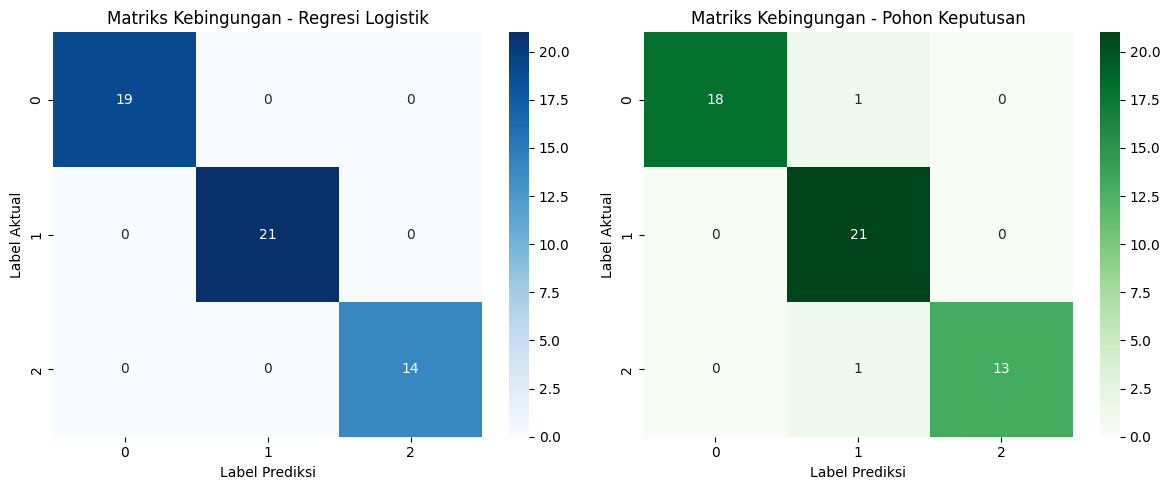

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Menghitung matriks kebingungan
cm_logreg = confusion_matrix(y_uji, tebakan_logreg)
cm_tree = confusion_matrix(y_uji, tebakan_tree)

# Membuat kanvas dengan 2 grafik bersebelahan (1 baris, 2 kolom)
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Plot Matriks Kebingungan 1: Regresi Logistik
sns.heatmap(cm_logreg, annot=True, fmt='d', cmap='Blues', ax=axes[0])
axes[0].set_title('Matriks Kebingungan - Regresi Logistik')
axes[0].set_xlabel('Label Prediksi')
axes[0].set_ylabel('Label Aktual')

# Plot Matriks Kebingungan 2: Pohon Keputusan
sns.heatmap(cm_tree, annot=True, fmt='d', cmap='Greens', ax=axes[1])
axes[1].set_title('Matriks Kebingungan - Pohon Keputusan')
axes[1].set_xlabel('Label Prediksi')
axes[1].set_ylabel('Label Aktual')

# Menyesuaikan tata letak agar rapi dan menampilkannya
plt.tight_layout()
plt.show()

Angka-angka di dalam tabel ini menunjukkan letak tebakan yang benar dan salah secara lebih jelas. Pada tabel regresi logistik, angka 19, 21, dan 14 posisinya pas menyilang di tengah, dan ruang sisanya hanya berisi angka nol. Posisi ini berarti semua datanya berhasil ditebak masuk ke kelompok yang benar tanpa ada yang meleset. Sedangkan pada tabel pohon keputusan, angka di posisi tengahnya adalah 18, 21, dan 13. Di sini terlihat ada dua angka 1 yang letaknya di luar garis tengah. Angka 1 di baris pertama menunjukkan ada satu data dari class_0 yang salah ditebak menjadi class_1. Lalu, angka 1 di baris ketiga menunjukkan ada satu data dari class_2 yang juga salah ditebak masuk ke class_1. Hal inilah yang membuat nilai presisi untuk class_1 pada laporan sebelumnya jadi turun, karena kelompok tersebut ketambahan dua tebakan salah dari kelas yang berbeda.

### Tugas 4

**Soal:** Simpulkan model mana yang lebih baik dan alasannya.

Bagian penutup ini akan dipakai untuk menentukan algoritma mana yang paling pas buat menangani data kimia anggur. Pemilihannya akan diatur agar berjalan otomatis menggunakan kondisi pemilihan, diikuti dengan pencetakan alasan yang berdasar pada skor akhir.

**Penjelasan Kode:** Langkah awal dilakukan dengan cara menghitung ulang angka akurasi mutlak dari kedua model. Fungsi `accuracy_score` kembali bertugas menghitungnya, lalu hasilnya disimpan ke variabel `skor_final_lr` untuk regresi logistik dan `skor_final_dt` untuk pohon keputusan. Teks pembuka dicetak, dilanjutkan dengan mencetak skor kedua model tersebut. Sisipan teks `:.4f` diletakkan di kurung kurawal agar angka desimalnya dipotong sampai empat digit saja biar rapi.

Sebuah blok persyaratan `if-else` kemudian dibangun untuk membandingkan kedua skor. Kalau nilai di `skor_final_lr` lebih besar, maka program akan masuk ke blok `if` dan mencetak kalimat penobatan kemenangan untuk regresi logistik. Sebaliknya, kalau nilai pohon keputusan yang menang atau seimbang, program akan masuk ke jalur `else` dan mencetak teks kesimpulan alternatifnya.

In [5]:
# Perhitungan evaluasi akhir untuk menentukan model terbaik
skor_final_lr = accuracy_score(y_uji, tebakan_logreg)
skor_final_dt = accuracy_score(y_uji, tebakan_tree)

print("HASIL EVALUASI AKHIR MODEL")
print(f"Skor Akurasi Akhir LogReg : {skor_final_lr:.4f}")
print(f"Skor Akurasi Akhir Tree   : {skor_final_dt:.4f}")

if skor_final_lr > skor_final_dt:
    print("Kesimpulan: Algoritma Logistic Regression dipilih sebagai model terbaik.")
    print("Alasan: Memberikan hasil prediksi yang lebih akurat pada fitur kimia dataset wine.")
else:
    print("Kesimpulan: Algoritma Decision Tree dipilih sebagai model terbaik.")
    print("Alasan: Mampu menangkap pola percabangan data yang lebih efektif pada pengujian ini.")

HASIL EVALUASI AKHIR MODEL
Skor Akurasi Akhir LogReg : 1.0000
Skor Akurasi Akhir Tree   : 0.9630
Kesimpulan: Algoritma Logistic Regression dipilih sebagai model terbaik.
Alasan: Memberikan hasil prediksi yang lebih akurat pada fitur kimia dataset wine.


Teks yang keluar menunjukkan regresi logistik terpilih sebagai model yang lebih baik pada pengujian ini karena nilai skor 1.000 lebih besar dari 0.9630. Alasan utamanya berhubungan dengan isi datanya. Dataset anggur memiliki 13 ciri kimia yang berbentuk angka bervariasi. Regresi logistik bekerja lebih baik karena hitungan peluangnya lebih cocok memproses angka-angka yang bentuknya berkelanjutan seperti ini. Sedangkan pembatasan aturan pada pohon keputusan justru membuat proses pilah datanya menjadi terlalu kaku, sehingga beberapa tebakan akhirnya masuk ke kelompok yang salah.

## Kesimpulan

Praktikum pertemuan keempat ini memberikan pemahaman langsung tentang cara algoritma mengelompokkan data. Algoritma yang dicoba ternyata mempunyai kecocokan yang berbeda pada setiap bentuk data. Regresi logistik bekerja sangat baik pada data angka yang ciri kimianya beragam, asalkan pengaturan batas hitungannya diperbesar agar pencariannya tidak terhenti. Di sisi lain, pohon keputusan punya cara pemilahan yang lebih mudah dimengerti, namun batas aturan cabangnya kadang menyebabkan ada data yang meleset. Pemakaian alat ukur seperti matriks kebingungan dan laporan klasifikasi juga menjadi keharusan, karena persentase akurasi saja tidak bisa memperlihatkan bagian mana saja yang ditebak dengan salah oleh model.